# Text Processing and Word Embeding
* **数据集**   
The IMDB Movie Review Dateset  
1.50k movie reviews
## 文本处理  
**1.Tokenization**  
将文本分割成token(单词)一个token就是一个单词，得到一个存放单词的列表  
**2.统计词频**  
将每个单词在文中出出现的次数统计出来，按降序排序，将低频词剔除，保留高频词。  
删掉低频词对于模型的训练不会有太大的影响，而且可以减少输入的维数，减少计算量。   
**3.Build dictionary**   
创建一个字典，将每个单词映射为一个数字得到一个数字列表，即squences    
**4.Align Sequences**  
因为每条电影品论的字数都不一样，这样每个样本的形状也都不一样。但是机器学习模型输入的样本必须是形状相同的。这时，就需要用Align Sequences，固定Sequences的长度为w，如果超过w个词，就砍掉文本前面多余的词，如果不足就做zero-padding，在文本前面用0补齐。
## Word Embedding:word to Vector
到目前，每个单词都是由一个数字来表示，现在将数字转化成one-hot向量,有多少的单词one-hot向量就有多少维。如果单词很多，向量的维数就会很大，计算机可能难以计算.所以要用Word Embeding 将高维的one-hot向量映射到低维向量
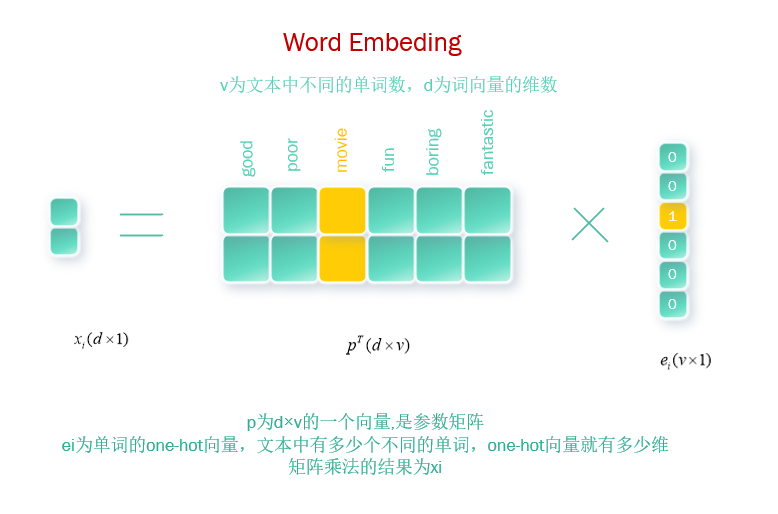
## 代码
```
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding
from keras import optimizers
emdedding_dim=8
model.add(Embedding(vocabulary,embedding_dim,input_length=word_num))#词汇量v=10k,d=词向量的维度,每个影评的长度word_num=20
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()
epochs=50#把训练数据全部扫50遍
model.compile(optimizer=optimizers.RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=epochs,batch_size=32,validation_data=(x_valide,y_valide))
loss_and_acc=model.evaluate(x_test,labels_test)
print('loss='+str(loss_and_acc[0]))
print('acc='+str(loss_and_acc[1]))

```
## Simple RNN

```
from keras.models import Sequential
from keras.layers import SimpleRNN,Embedding,Dense
vocabulary=10000
embedding_dim=32
word_num=500
state_dim=32
model=Sequential()
model.add(Emdedding(vocabulary,embedding_dim,input_length=word_num))
model.add(SimpleRNN(state_dim,return_sequences=False))#return_sequences=False表示只返回最后一个状态向量h
model.summary()

epochs=3#
model.compile(optimizer=optimizers.RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=epochs,batch_size=32,validation_data=(x_valide,y_valide))
loss_and_acc=model.evaluate(x_test,labels_test)
print('loss='+str(loss_and_acc[0]))
print('acc='+str(loss_and_acc[1]))

#返回所有的状态向量h

from keras.models import Sequential
from keras.layers import SimpleRNN,Embedding,Dense
vocabulary=10000
embedding_dim=32
word_num=500
state_dim=32
model=Sequential()
model.add(Emdedding(vocabulary,embedding_dim,input_length=word_num))
model.add(SimpleRNN(state_dim,return_sequences=True))#return_sequences=True表示返回所有的状态向量
model.add(Flatten())
model.summary()

epochs=3#
model.compile(optimizer=optimizers.RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=epochs,batch_size=32,validation_data=(x_valide,y_valide))
loss_and_acc=model.evaluate(x_test,labels_test)
print('loss='+str(loss_and_acc[0]))
print('acc='+str(loss_and_acc[1]))


```
* **缺陷**  
具有遗忘的问题

## LSTM

### 代码
```
from keras.models import Sequential
from keras.layers import LSTM,Embedding,Dense
vocabulary=10000
embedding_dim=32
word_num=500
state_dim=32
model=Sequential()
model.add(Emdedding(vocabulary,embedding_dim,input_length=word_num))
model.add(LSTM(state_dim,return_sequences=True,dropout=0.2))
model.add(LSTM(state_dim,return_sequences=True,dropout=0.2))
model.add(LSTM(state_dim,return_sequences=False,dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

```

## Bi-LSTM
双向LSTM 可以改善单向LSTM的遗忘。从前往后的一条链会遗忘最开始的状态，从后往前的一条链会遗忘最后面的状态。两者综合，会明显改进LSTM的遗忘。  

### 代码

```
from keras.models import Sequential
from keras.layers import LSTM,Embedding,Dense,Biderectional
vocabulary=10000
embedding_dim=32
word_num=500
state_dim=32
model=Sequential()
model.add(Emdedding(vocabulary,embedding_dim,input_length=word_num))
model.add(Biderectional(LSTM(state_dim,return_sequences=False,dropout=0.2)))#保留两条链最后一个状态向量
model.add(Dense(1,activation='sigmoid'))
model.summary()

```

## pretraining
* **为什么要预训练**  
例如，如果在训练卷积神经网络的时候，如果网络太大而训练集不够大，可以先找一个大的数据进行预训练。这样可以使神经网络有一个比较好的初始化，也可以避免overfiting

### 做法
1.找到一个比较大的数据集，并且与我们的目标任务很相似的一个数据集  
2.搭建一个神经网络(什么模型不重要，只要有embedding层就行)   
3.在大数据集上训练网络
4.训练好后，只保留embedding层和训练好的模型参数  
5.搭建我们新的网络，embedding层的模型参数是之前已经训练好的  
6.训练的时候将embedding层固定住，不训练embedding层的参数，训练其他参数。

## 总结
* 实际训练中，SimpleRNN的效果并不好，所以最好用LSTM  
* 尽量使用双向LSTM，效果一般都比单向好  
* 使用Stack RNN在大数据集上可能会更好  



## Text Generation  
1.将文章划分成很多片段，这些片段都有重叠。第一个片段的最后一个字母作为标签，前面的部分作为样本。然后将片段向后移strides个字母，又成为一个样本，最后一个字母作为标签。依次后推。
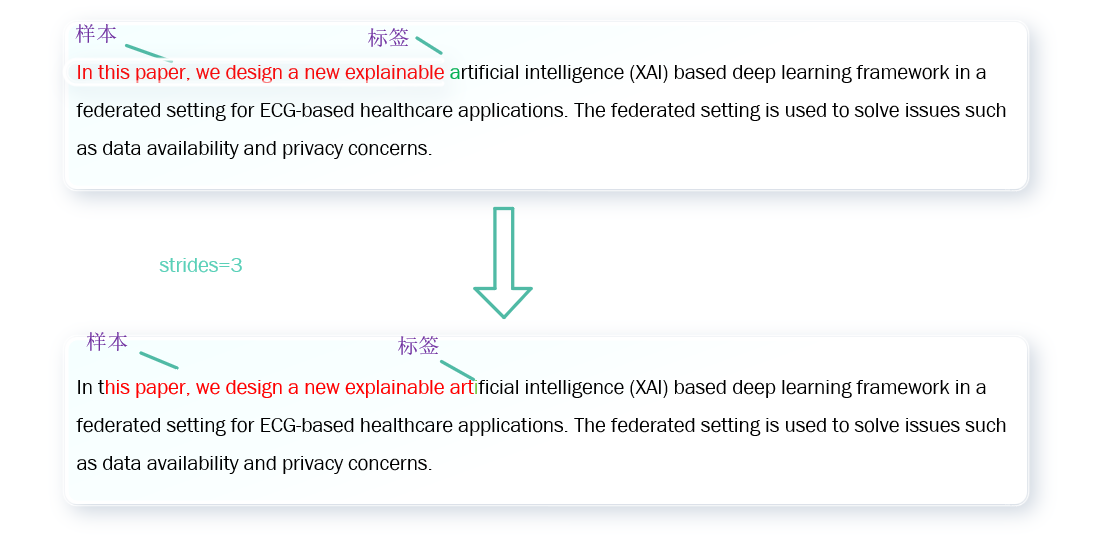

* **目的**  
训练神经网络的目的是给定输入的片段，神经网络可以预测下一个片段，也就是一个多分类问题  
训练的文本是什么风格的，生成的文本就是什么风格的。
### 具体操作  
1.读取文本   
2.将文本划分成片段和labels   
3.创建一个字典，将一个字母映射到一个数字，这样一个片段就会变成一个矩阵。将每个数用one-hot向量表示。  
**一个文本里面英文字母加上空格以及其他字符一共有57个，所以每个字符经过one-hot encoding后为57维。  
一个片段有n个字符，则一个片段作为输入X的形状为$(n,57)$.标签为#$(57,1)$的向量**  
### 代码  
* **注意**  
这里只能用单向LSTM，不能用双向因为文本生成需要预测下一个字符，必须是从前往后，不能是从后往前。是一个单向的问题   

```
from keras import layers
model=keras.model.Sequential()
model.add(layers.LSTM(128,input_shape=(seg_len,vocabulary)))
model.add(layers.Dense(vocabulary,activation='softmax'))
model.summary()
optimizer=keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=optimizer)
model.fit(x,y,batch_size=128,epochs=1)
#文本生成  
pred=model.predict(x_input,verbose=0)[0]#x是一个57维的向量，是这57个字符的概率分布

```
###  如何选取生成的下一个字符？  

* **greedy selection**  
哪个字符的概率最大就选择哪个字符  
```
next_index=np.argmax(pred)#得到概率最大字符的索引，然后在之前创建的字典里面查一下位置就可以还原对应的字符了  
```
缺点: 这种方法是确定性的，没有随机性。生成的文本完全取决于初始的输入，而我们希望生成的文本尽量多元化，这样才有可能产生有意思的结果。  
* **sampling from the multinomial distribution(从多项式分布中随机抽取)**   
假如一个字符的概率是0.3，那么它被抽取的概率就是0.3  
```
next_onthot=np.random..multinomial(1,pred,1)  
nex_index=np.argmax(next_onehot)  
```
缺点:生成的文本太过于随机，会出现语法错误  
* **adjusting the multinomial distribution**  
这个方法介于前两种方法之间，具有随机性，但是随机性不是特别大,用temperature调整概率值  
```
pred=pred**(1/temperature)#temperature是介于0-1之间的数，将概率值做指这种密变换。
pred=pred/np.sum(pred)#变换之后，大的概率值会变大，小的概率值会变小   
#temperature越小，变换得越极端，大的概率会接近1，其余得概率会接近零。temperature越大，变换就越不明显  
```

### 如何生成文本？  
文本生成器的初始状态是一个全零向量   
当模型在一个比较大得文本数据集中训练好后，我们固定片段的长度，设置一个最初始的文本片段作为seed，然后根据seed预测下一个字符，将seed最前面的一个字符去掉，与预测的字符组成一个新的片段，作为下一个输入，继续预测下一个字符。依次重复。  

## Seq2Seq (机器翻译) 
输入和输出是一个多对多的问题，输入和输出的长度都不固定   
* **准备数据**    
只是学习一下，我们用一些小的数据集就可以满足了  
http://www.manythings.org/anki 这个网站中有多种语言翻译的数据 
打开数据集，是一个文本文件，文本的一边是要翻译的语言，另一边是用另一种语言表示。  
以用德语翻译英语为例  
* **数据预处理** 
将大写字母转化成小写字母，去掉标点符号  
* **Tokenization 和 Build Dictionary**  
需要将英语和德语分别进行tokenization ,然后建立一个英语字典，一个德语字典。因为英语词汇和语法和德语词汇和语法完全不一样，创建两个字典是为了让翻译后的句子符合德语的语法。所以对于翻译问题，要进行2个tokenization,创建两种语言的字典。  
英语有26个拉丁字母，如果区分大小写一共有52字母  
德语有26个拉丁字母还有4个不常用的字母  
希腊语使用不同的字母，有24个希腊字母区分大小写一共有58个  
中文没有字母，但是又有几千个汉字  
日语有46个平假名，46个片假名，几百个汉字  
>**Tokenization的两种方法**  
>* **char-level:**把一句话分割成很多字符  
>* **word-level:**把一句话分割成很多单词
>这里是用char-level  
这里我们用keras库自动生成字典，英语是原语言，德语是目标语言。  
1.要在目标语言德语中加入两个字符，一个是起始符，一个是终止符。用'\t'做起始符，'\n'做终止符(只要与字典里的字符冲突就可以)  
2.one-hot encoding:将两个字典中的字符映射到数字上，进一步用one-hot向量表示,每个字符用一个one-hot向量表示，每句话用一个矩阵表示，即为网络的输入 

### 训练模型   
Seq2Seq Model中有一个Encoder(编码器)和一个Decoder(解码器)  
Encoder:是一个LSTM或者其他RNN模型，用来从输入的英语句子中提取特征，Encoder的最后一个状态向量(h,c)就是从输入的句子中提取的特征，包含这个句子的信息，其他的状态向量都没用(舍弃)  
Decoder:是一个LSTM模型的文本生成器用来生成德语。Decoder的初始状态是Encoder的最后一个状态(h,c),通过输入的(h,c)得知输入的英语句子。然后开始生成德语，如果输入的英语句子为good away,那么标准的德语翻译mach ne fliege。每次接收一个输入输出对下一个字符的预测。

### 损失函数  
Dencoder第一个输入必须是起始符'\t',然后Decoder会生成一个预测p(为预测值的概率分布),我们将m作one-hotEncodding作为标签y，得到Loss函数：CrossEntropy(y,p),我们希望p尽量接近y，所以损失函数越小越好。然后将损失进行反向传播到Decoder，再传到Encoder中。用梯度下降更新Encoder和Decoder的模型参数。下一个字符是两个字符\tm，再下一个是三个字符\tma，一直将整句德语作为输入，将停止符的ont-hot向量作为标签，计算损失函数，一直重复直到翻译完。  
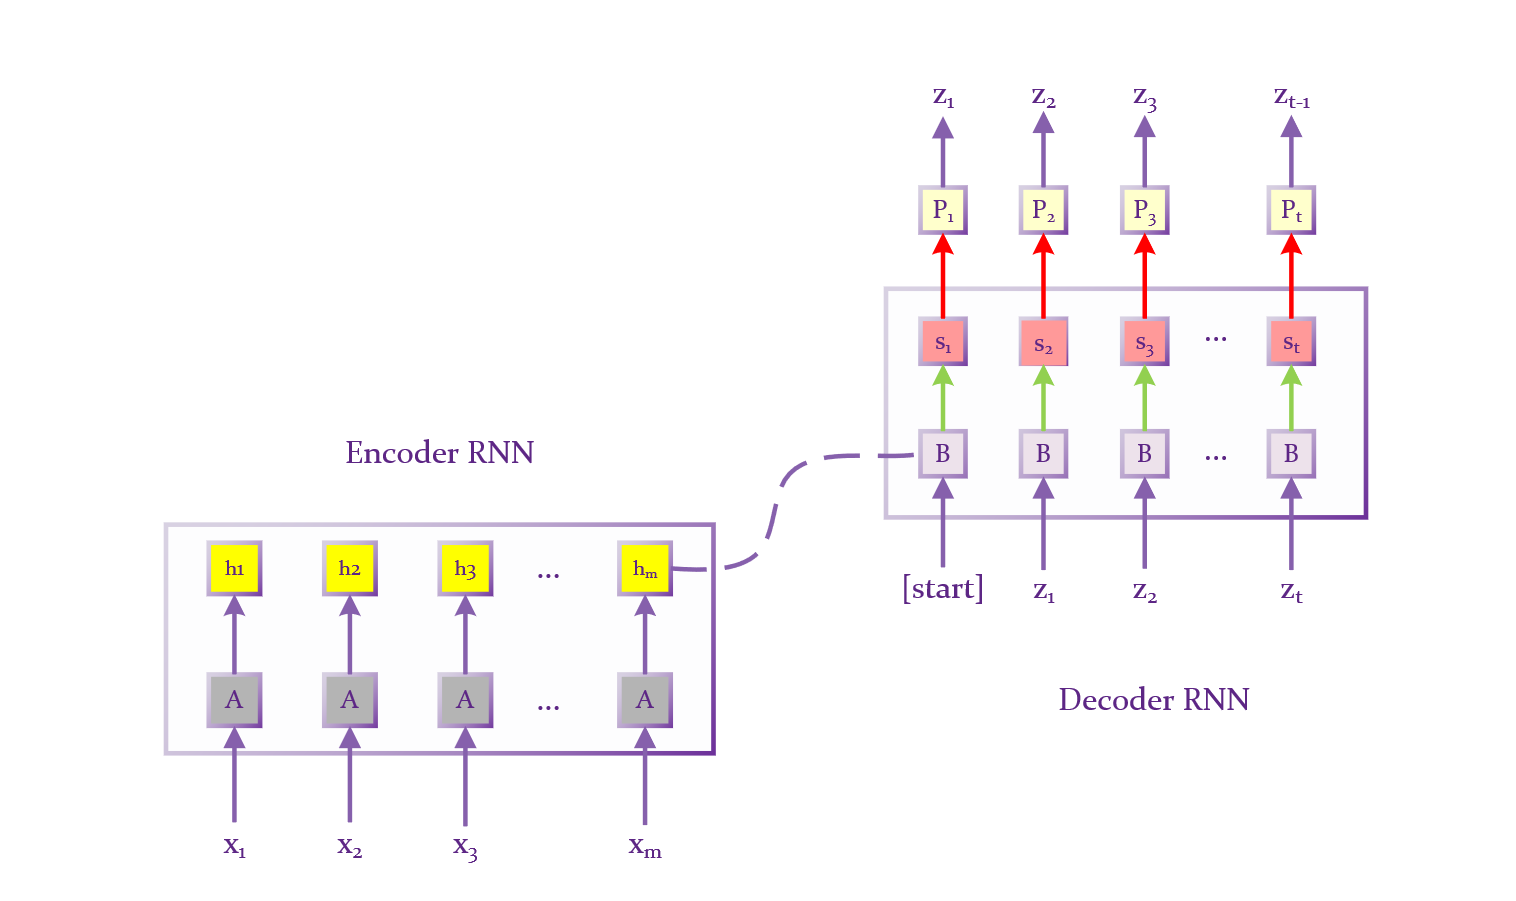

## 如何改进Seq2Seq模型  
* Encoder处理输入的英语句子，把信息都压缩到状态向量$(h_t,c_t)$,最后一个状态是整句话的一个概要，理想状态下包含整个英语句子的完整信息。如果句子太长，LSTM就会遗忘，则最后一个状态向量不完整，输入到Decoder里，生成的德语句子也不完整
1.一个改进方法：使用双向LSTM(Encoder only!)，会减缓LSTM的遗忘缺点。Decoder必须是单向的，因为Decoder就是一个文本生成器，是预测模型只能是单向的。  
2.本例中encoder中使用的是char-tokenization,而word-level tokenization会缩短句子的长度，网络更不容易遗忘,但是确需要更大的数据集，否则会出现overfitting 
3.多任务学习，添加更多的Decoder，生成更多的语言，通过借助其他语言可以把Encoder变得更好      
4.**Attention!(最强)**  

## Attention   

Attention可以大幅度提升Seq2Seq模型。Seq2Seq有一个很大的缺陷，如果输入的句子很长，encoder会记不住整个句子的信息，得到的最后一个状态向量$(h_t,c_t)$可能会遗漏一些信息。那么Decoder就不会知道完整的句子，也就不会生成完整的翻译。而Attention可以有效的解决这个问题。  
* **最早提出的论文：Neural machine translation by jointly learning to align and translate.In ICLR,2015.** 

### 原理 

在encoder已经结束工作之后，Attention与Decoder同时开始工作，decoder的初始状态$s_0$是encoder的最后一个状态向量$h_m$，encoder的所有状态$h_0,h_1,h_2,…$都要保留，需要计算$s_0$与每一状态的相关性，用公式$$ Weight:{\alpha}_i=align(h_i,s_0)$$
表达$h_i,s_0$的相关性。encoder有$m$个状态，所以要计算出${\alpha}_1,{\alpha}_2,{\alpha}_3,…，{\alpha}_m$。${\alpha}_i$是介于0-1之间的数。 v与w都是参数，需要从训练数据里学习.下图的方法是最早的论文中提出的权重计算方法。  

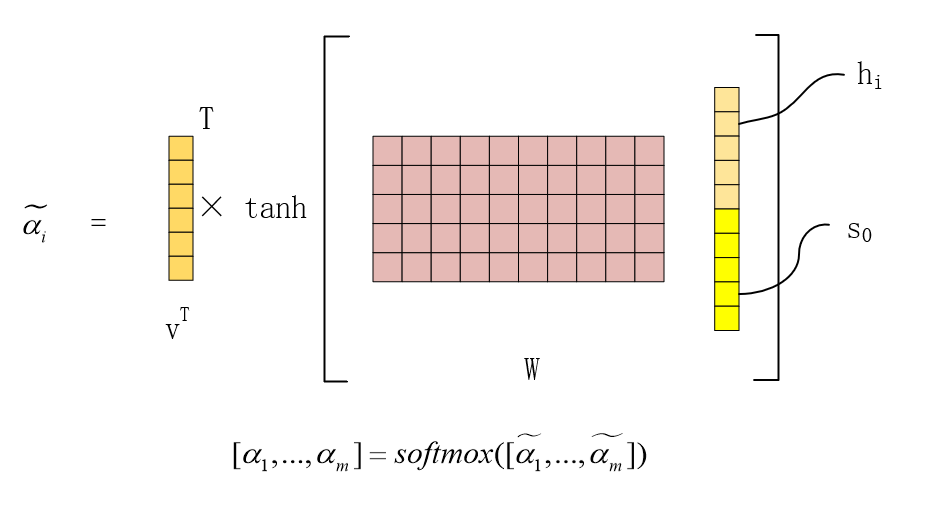  
* **其他计算权重方法(transform采用)**  

$k_i=W_k \times h_i,$for i=1 to m  

$q_0=W_Q \times s_0.$  

$\overline{\alpha}_i=k^{T}_i{q_0},$for i=1 to m.  

$[\alpha_1,...,\alpha_m] = softmax([\overline{\alpha}_1,...,\overline{\alpha}_m])$   
接下来继续计算Context vector c_0.$$c_0={\alpha}_1{h_1}+{\alpha}_2{h_2}+…+{\alpha}_m{h_m}.$$
每个Decoder状态$s_i$都会对应一个$c_o$
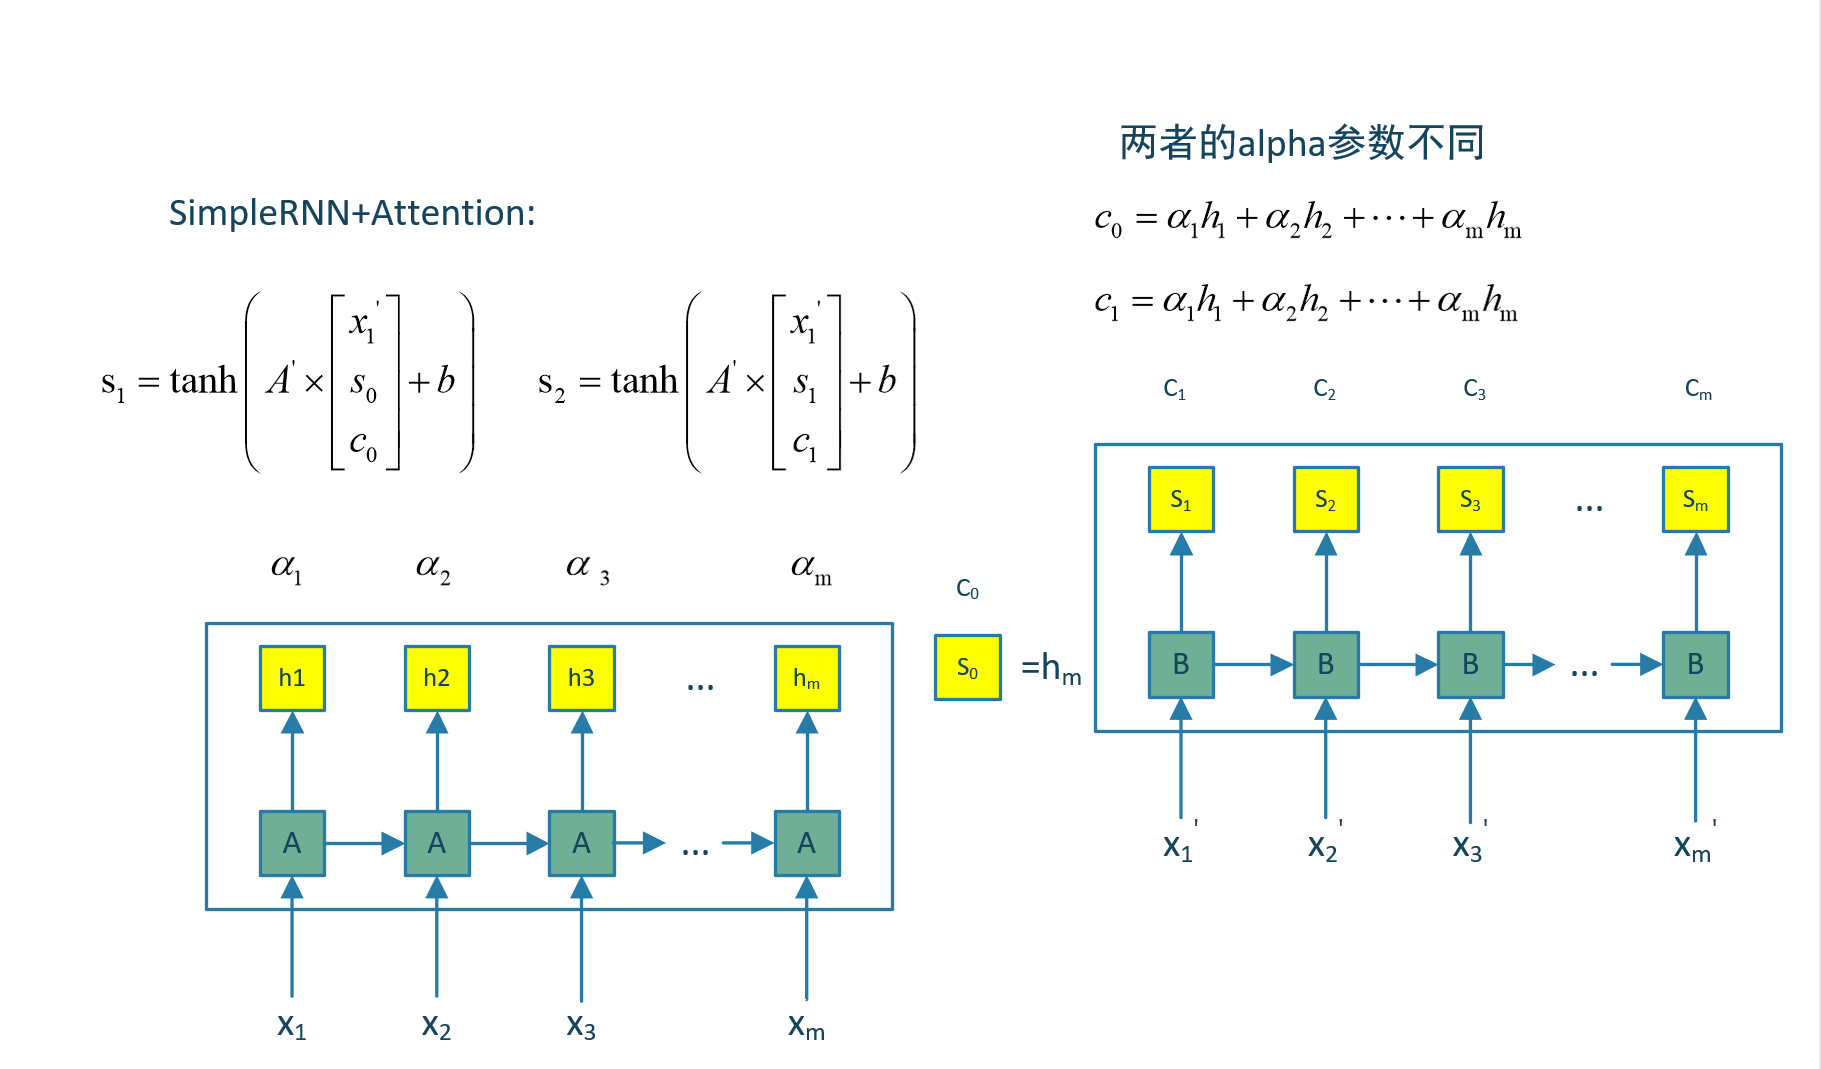

### 优缺点  
* **优点**  
Attention可以处理较长的句子，解决RNN容易遗忘的缺点。  
Attention会告诉解码器应该关注哪些部分，可以使句子翻译的更准确。  
* **缺点**  
计算量非常大   
Simple RNN的时间复杂程度是t+m,而Simple+Attention的时间复杂程度是t×m,所以参数的数量很多，计算量很大。  

## Self-Attention
Self-Attention可以用在一个RNN网络上，并不局限于Seq2Seq模型。Attention的第一篇文章发表在2015年，用来解决Seq2Seq模型，Self-Attention发表在2016年，可以适用于所有的RNN网络。Self-Attention与Attention的思想基本一样，但是做了稍微的改变。RNN网络输入的初始状态  
* **计算步骤**   
$h_0=0,c_0=0,它们都是全零向量$   

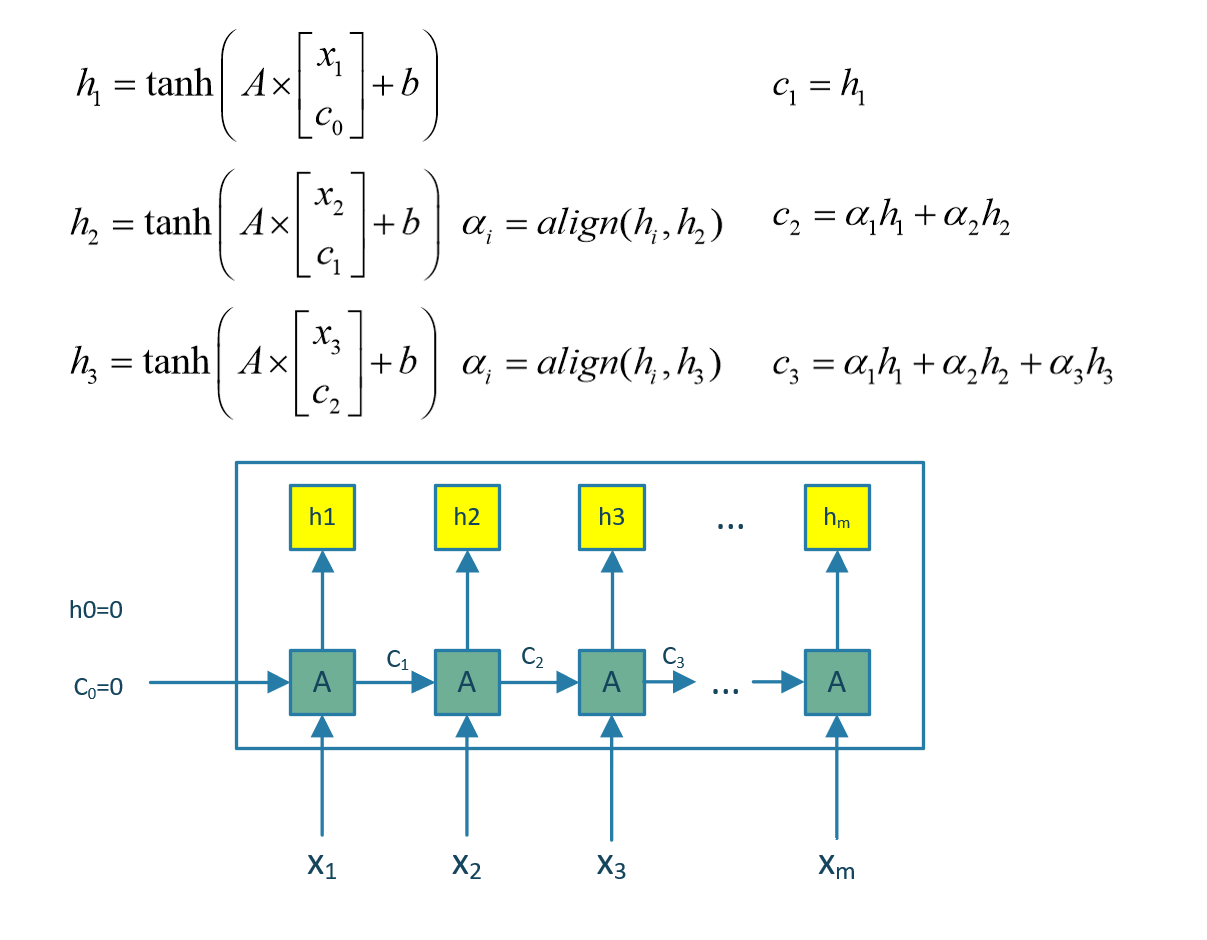

# transformer 

## 背景简介  
2018谷歌推出了一个很厉害的模型BERT,取得了很大的成功。而它能取得成功的一个重要原因就是Transformer的作用。transformer改进了RNN训练慢的缺点。利用self-attention机制实现快速并行，而且transform可以增加到很深的深度。Transformer由论文《Attention is All You Need》提出.
## 简单介绍  
* transformer 实质上是一个Seq2Seq的模型  
* transformer不是RNN网络,并没有循环的结构  
* 只有Attention和全连接层   
* 效果惊人，完爆最好的RNN+Attention模型 
transformer是用一个Attention层和一个Self-Attention层组成的。

## transformer架构  
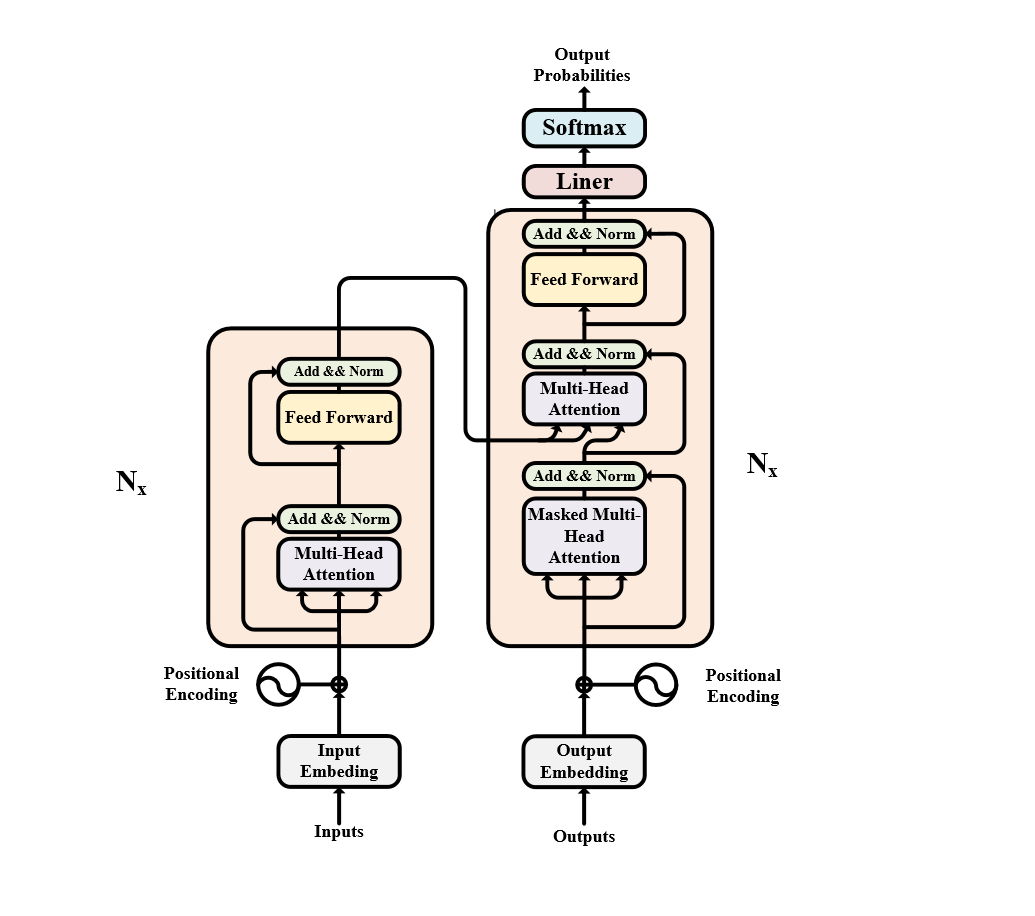

### 问题？ 

如果把RNN去掉，只用Attention搭建一个神经网络来代替RNN，如何搭建？  

## 搭建一个基于Attention的深度神经网络    
* **移除RNN，仍然考虑Seq2Seq模型**   
Encoder的输入是向量$x_1,x_2,...,x_m$  
Decoder的输入是向量$x^{'}_1,x^{'}_2,...,x^{'}_t$(该输入是Decoder预测的)  

### Attention Layers 

首先用encoder的输入计算参数矩阵k和向量  
输入x经过线性变换变成矩阵$k_{:i}$,经过线性变换变成$v_{:i}$  

$$
key:k_{:i}={W_k}{x_i}\\
Value:v_{:i}={W_v}{x_i}\\
$$
则$x_1$被映射为$k_{:1},v_{:i}$,$x_2$被映射为$k_{:2},v_{:2}$,一共可以得到m个k向量和v向量，然后将Decoder的输入$x^{'}_1,x^{'}_2,...,x^{'}_t$做线性变换变成矩阵$q_{:j}$
$$
Query:q_{:j}={W_Q}x^{'}_j
$$
将$x^{'}_j$映射到q向量，一共有t个q向量  
* **权重与context vector的计算**  
$$
Weights:{\alpha}_{:1}=softmaxt(K^{T}q_{:1})[K由k_{:1},...,k_{:m}个向量组成]\\
Context vector:c_{:1}={\alpha}_{11}v_{:1}+…+{\alpha}_{m1}v_{:m}=V{\alpha}_{:1}\\
Weights:{\alpha}_{:2}=softmaxt(K^{T}q_{:2})[K由k_{:1},...,k_{:m}个向量组成]\\
Context vector:c_{:2}={\alpha}_{12}v_{:1}+…+{\alpha}_{m2}v_{:m}=V{\alpha}_{:2}\\  
c_{:j}依赖于所有的k向量和v向量，所以c_{:j}依赖于所有的x向量
$$
最后,一共有t个c,t个alpha,每个$x^{'}对应一个c和一个{\alpha},这些c可以用C表示:C=[c_{:1},c_{:2},...,c_{:t}$ 
* **Attention layers Summary**  
$
Attention layers:C=Attn(X,X^{'}).\\
encoder输入:X=[x_1,x_2,...,x_m].\\
Decoder输入:X_{'}=[x^{'}_1,x^{'}_2,...,x^{'}_t]\\
parameters:W_Q,W_K,W_V.
Attention层的输出为t个c  
$
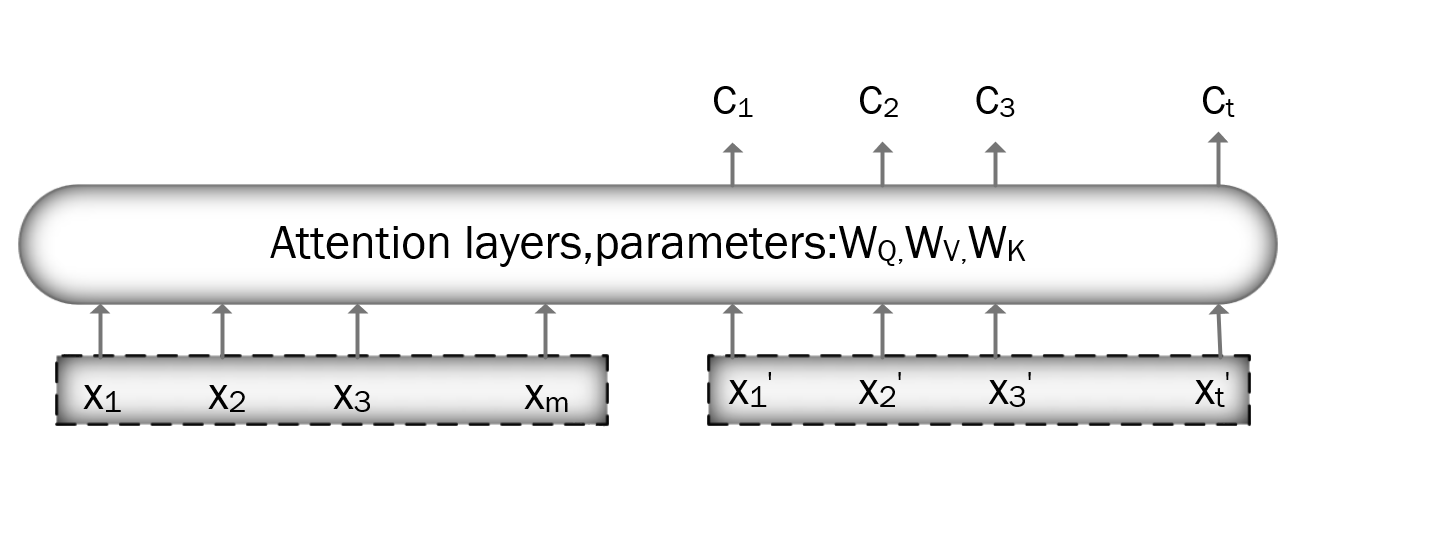   
### Self-Attention 
$
Self-attention layers:C=Attn(X,X)\\
Parameters:W_Q,W_K,W_V.\\
该层的输出为[c_{:1},...,c_{:m}]\\
$
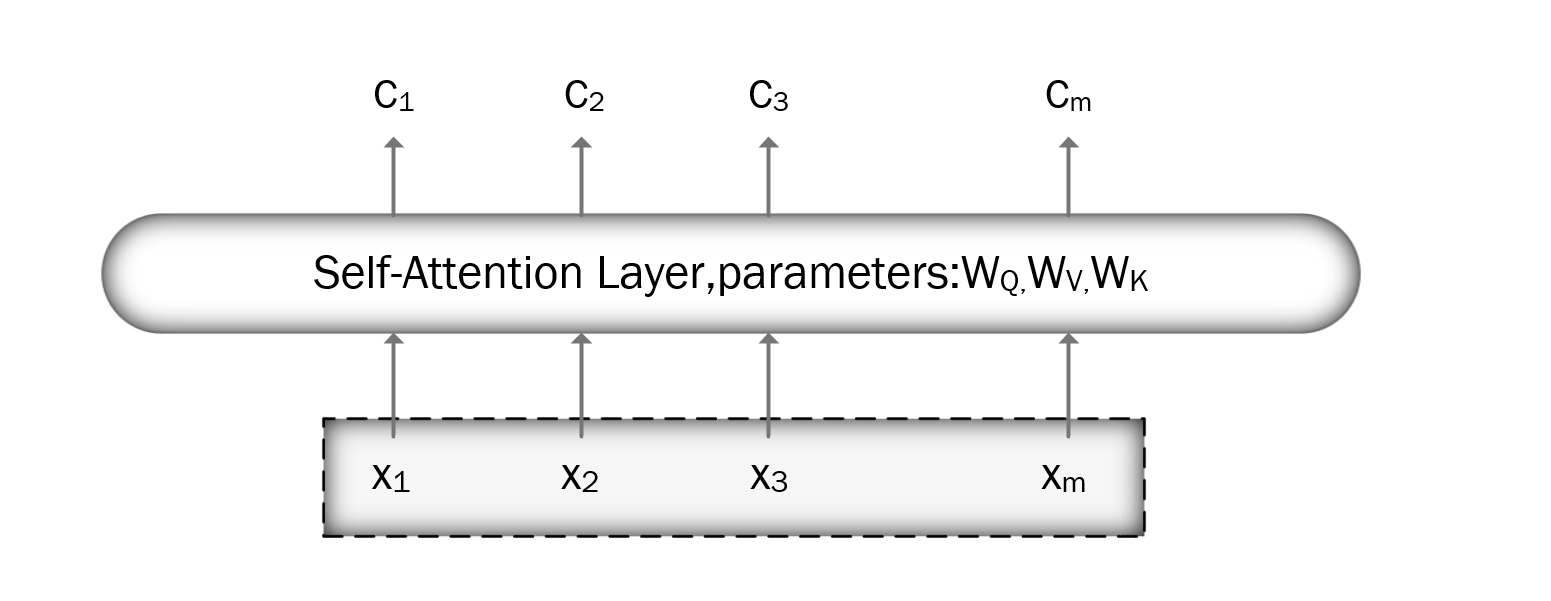
* **做法**  
对x进行变换
$$
key:k_{:i}={W_k}{x_i}\\
Value:v_{:i}={W_v}{x_i}\\
Query:q_{:j}={W_Q}x_j
$$
线性变换后，每个$x$被映射为三个向量$q,k,v$  
* **计算权重** 
$$
Weights:{\alpha}_{:1}=softmaxt(K^{T}q_{:1})[K由k_{:1},...,k_{:m}个向量组成]\\
Weights:{\alpha}_{:2}=softmaxt(K^{T}q_{:2})[K由k_{:1},...,k_{:m}个向量组成]
$$
一共有m个alpha向量。
* **计算context vector**  
$$
c_{:1}={\alpha}_{11}v_{:1}+…+{\alpha}_{m1}v_{:m}=V{\alpha}_{:1}\\
c_{:2}={\alpha}_{12}v_{:1}+…+{\alpha}_{m2}v_{:m}=V{\alpha}_{:2}\\
c_{:j}依赖于所有的k向量和v向量，所以c_{:j}依赖于所有的x向量
$$
## 总结  
* **Attetion:最开始用来改进Seq2Seq模型**    
最论文发表在2015年，Neural machine translation by jointly learning to align and translate   
* **Self-Attention:适用于所有的RNN模型，并不局限于Seq2Seq模型**   
2016，Long Short-Term Memory-Networks for Machine Reading   
* **将RNN剔除，单独使用Attention**  
2017,Attention is All You Need(提出transformer)
加入图片说明  
## 搭建transformer  
上面我们所讲的Attention和self-Attention都是单头(single-head)的，我们要将单头attention 变成多头attention,每个单头attention都有不同的参数矩阵，它们不共享参数，所以它们有自己的输出c，将l个单头的输出c做Concatenating堆叠起来，就是多头Attention(multi-head)的输出。Self-Attention也是一样，将单头的输出做Concatenation堆叠起来成为多头Self-Attention。然后用多头Atttention和多头Self-Attention两个层来搭建transformer。  
首先用多头Self-Attenion与全连接层来搭建一个encoder网络。
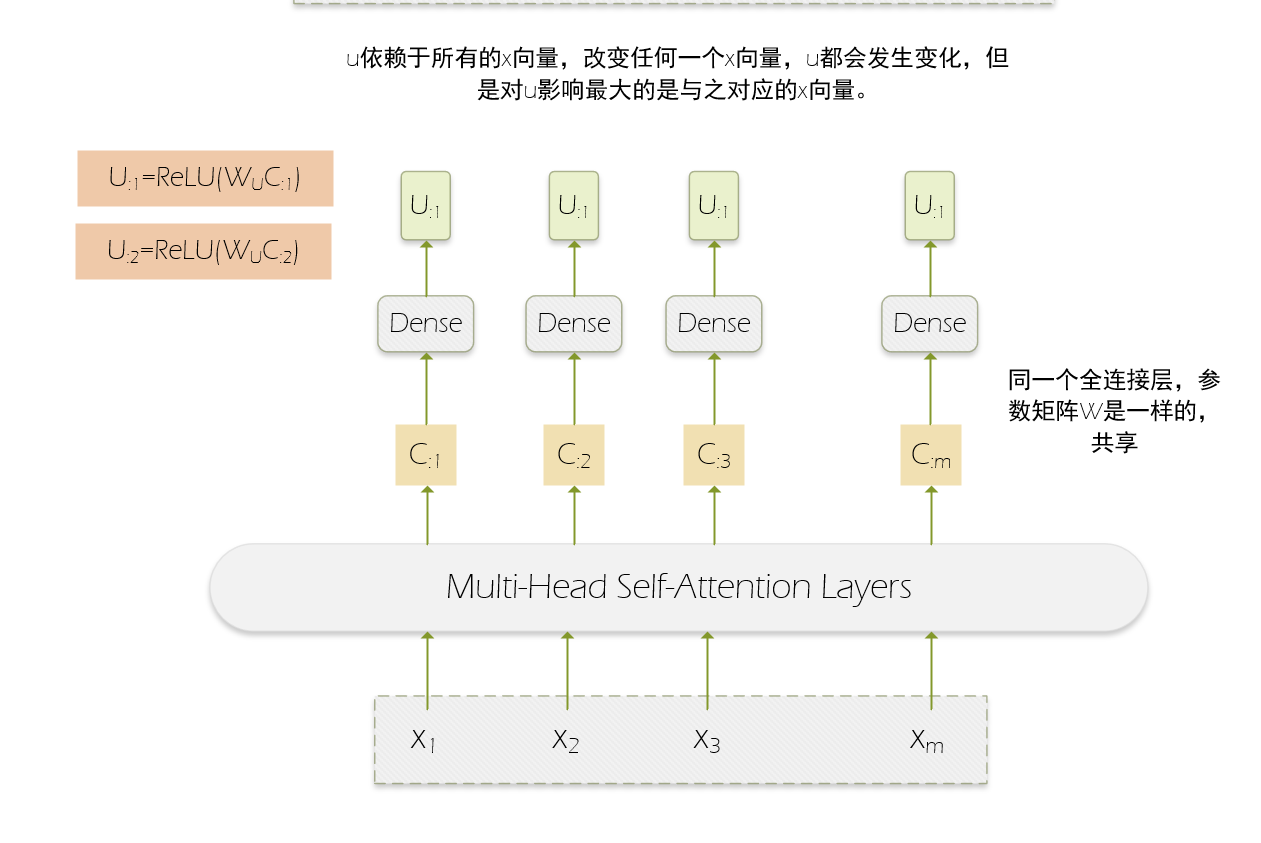
可以再这个基础上，继续搭多头Self-Attention和全连接层，堆叠起来就成为一个深度神经网络。 
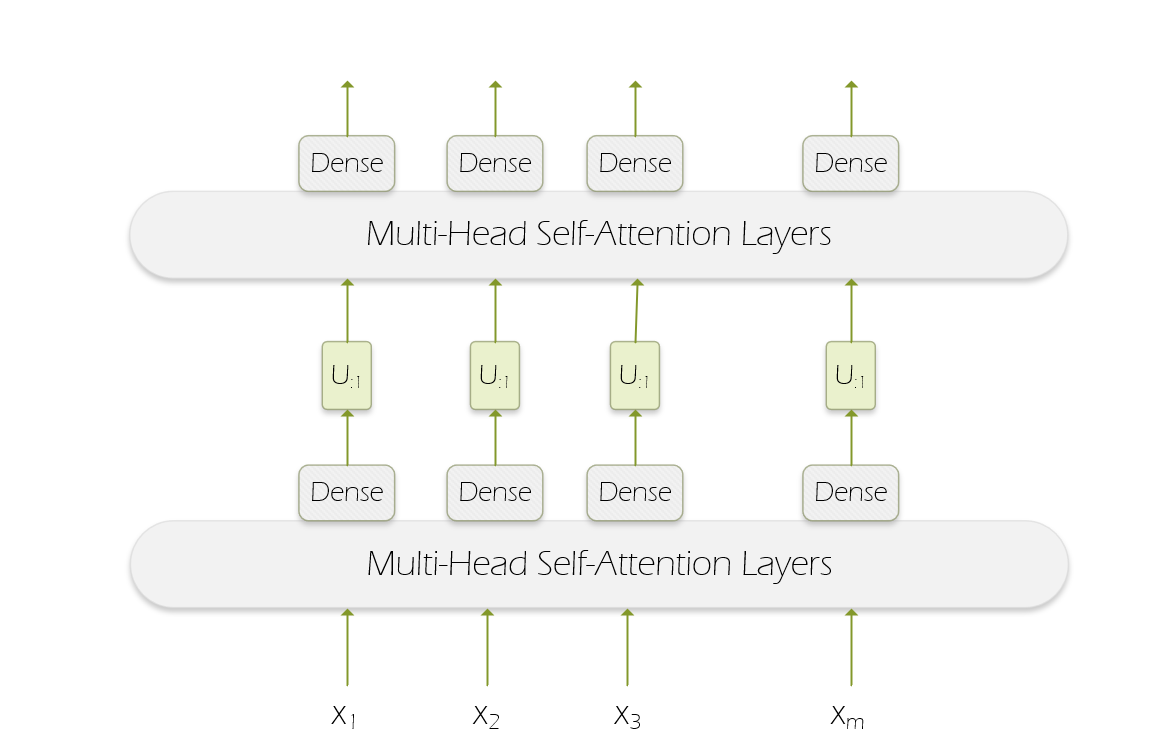
* **搭建Encoder**  
一个Self-Attention和一个全连接层为一个block.encoder由这些block堆叠而成，其中每个block之间会有SENet  
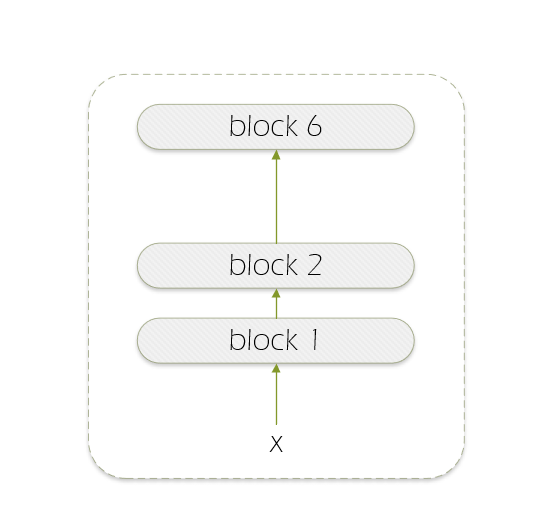
* **搭建transformer**  
类似的我们可以搭建出decoder的block，block有三层：多头Self-Attention层，多头Attention层，全连接层。
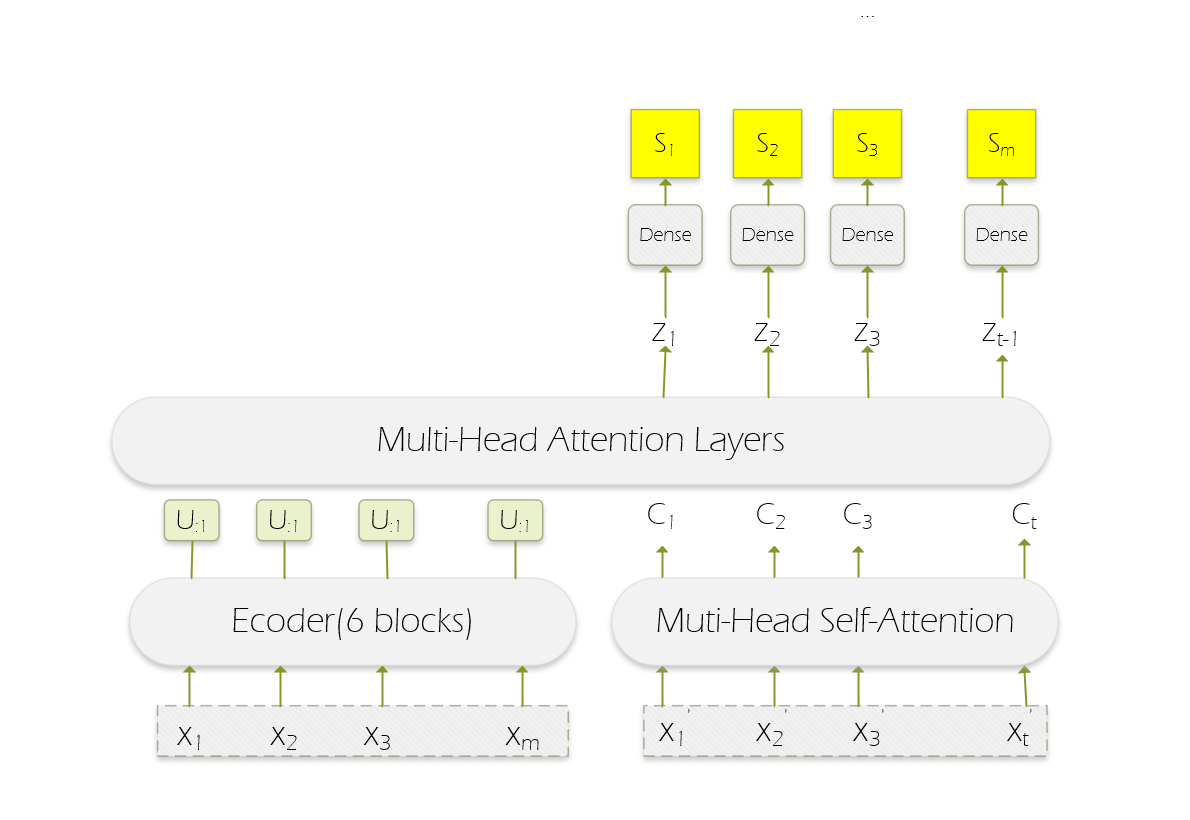  
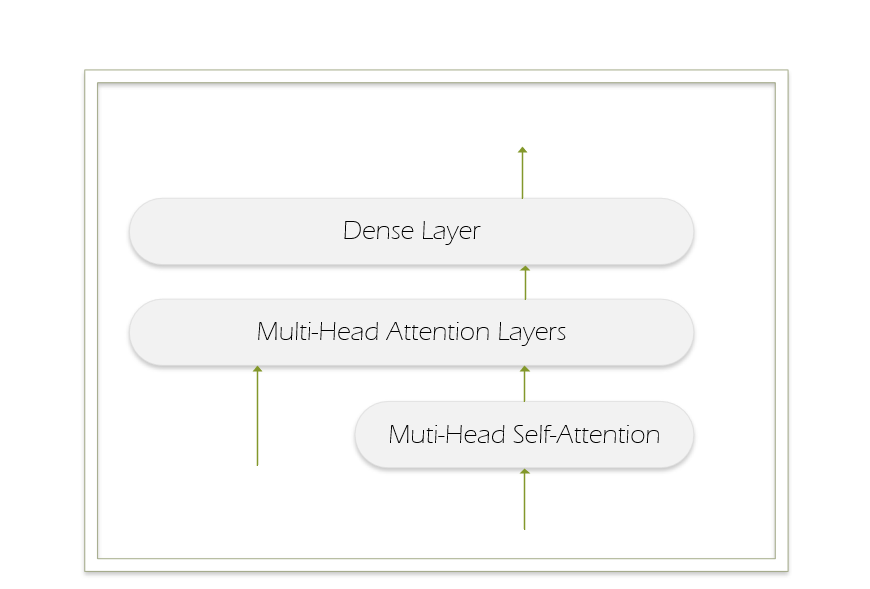
将这些模块组合起来，就是transformer模型 

## LayerNorm
layerNorm与BatchNorm不同的是，它对每个batch进行的归一化，而batchnorm是对所有batch一起进行归一化   
公式   
$$
y=\frac{x-E(x)}{Var(x)+\epsilon} \times \gamma +\beta
$$
* **pytorch实现**

```
nn.LayerNorm(normalized_shape, eps=1e-05, elementwise_affine=True, device=None, dtype=None)
```
    normalized_shape: 归一化的维度，int（最后一维）list（list里面的维度）  
    eps：加在方差上的数字，避免分母为0   
    elementwise_affine：bool，True的话会有一个默认的affine参数    
    elementwise_affine就是公式中的 γ \gamma γ和 β \beta β，前者开始为1，后者为0，二者均可学习随着训练过程而变化   
    
## 模型复杂度分析


##  ViT(Vision Transformer)
ViT是目前图片分类最好的模型，超越了最好的CNN。visio transformer在2021年才发表。  
ViT是基于transformer的，其实就是transformer的encoder网络  
论文**An image is worth 16×16 words:transformers for image recognition at scale.In ICLR,2021**  
### 具体操作  
vi







